In [1]:
"""
Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign).
Use the PCA feature extraction for your training.
Perform N number of independent training (N=1, …, K).
Identify the optimum number of K, principal components that achieve the highest classification accuracy.
Plot your classification accuracy, precision, and recall over a different number of Ks.
Explain and elaborate on your results.
"""

'\nUse the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign).\nUse the PCA feature extraction for your training.\nPerform N number of independent training (N=1, …, K).\nIdentify the optimum number of K, principal components that achieve the highest classification accuracy.\nPlot your classification accuracy, precision, and recall over a different number of Ks.\nExplain and elaborate on your results.\n'

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [3]:
breast = load_breast_cancer()

#Add target column 
labels = np.reshape(breast.target,(569,1))
#set data = data + target
final_breast_data = np.concatenate([breast.data,labels],axis=1)
#create data frame using data
df = pd.DataFrame(final_breast_data) 

In [4]:
#add column names to data frame
features = breast.feature_names 
features_labels = np.append(features,'label')
df.columns = features_labels

In [17]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [23]:
accuracy_history = np.zeros(30)
precision_history = np.zeros(30)
recall_history = np.zeros(30)
for k in range(30):
    x = df.loc[:, features].values 
    # Separating out the target 
    y = df.loc[:,['label']].values 
    # Standardizing the features 
    x = StandardScaler().fit_transform(x) 
    
    #Apply pca
    pca = PCA(n_components=k) 
    principalComponents = pca.fit_transform(x) 
    principalDf = pd.DataFrame(data = principalComponents) 

    finalDf = pd.concat([principalDf, df[['label']]], axis = 1) 
    
    #split set into training(0.8) and validations(0.2) sets
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)
    
    #Apply the LogisticRegression function to training set and build model
    classifier = LogisticRegression(C=10, random_state=0) 
    classifier.fit(X_train, Y_train)

    #Apply the classifier model to the validation set
    Y_pred = classifier.predict(X_test)
    
    #add acccuracy, precision, and recall to their history 
    accuracy_history[k] = metrics.accuracy_score(Y_test, Y_pred)
    precision_history[k] = metrics.precision_score(Y_test, Y_pred)
    recall_history[k] = metrics.recall_score(Y_test, Y_pred)

C:\Users\ibrah\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ibrah\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ibrah\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ibrah\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

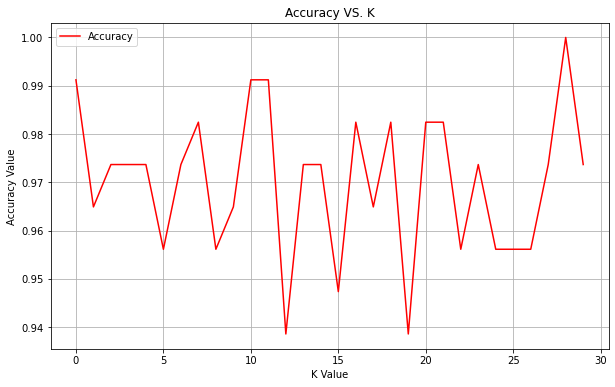

In [32]:
#graph accuracy
plt.plot(range(30),accuracy_history , color='red', label='Accuracy')
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('K Value') 
plt.ylabel('Accuracy Value') 
plt.title('Accuracy VS. K') 
plt.legend()

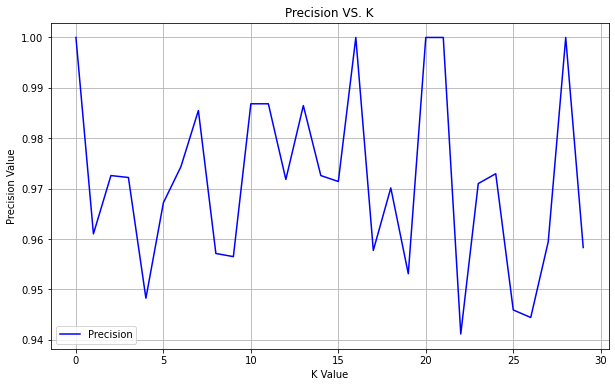

In [33]:
#plot precision
plt.plot(range(30),precision_history, color='blue', label='Precision') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('K Value') 
plt.ylabel('Precision Value') 
plt.title('Precision VS. K') 
plt.legend()

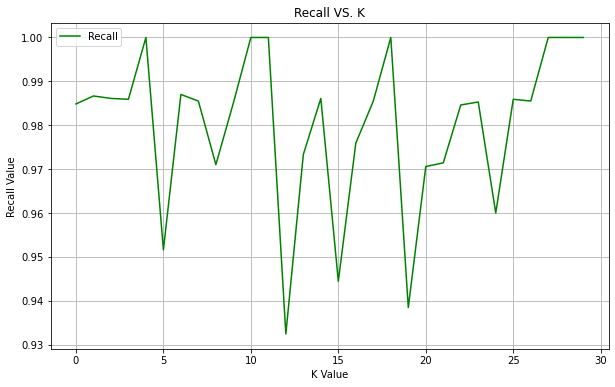

In [34]:
#graph
plt.plot(range(30),recall_history, color='green', label='Recall') #plot recall
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('K Value') 
plt.ylabel('Recall Value') 
plt.title('Recall VS. K') 
plt.legend()